In [ ]:
import numpy as np

In [ ]:
np.random.seed(34)

In [ ]:
import keras

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPooling2D, Dropout

In [ ]:
from keras.optimizers import SGD

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X_train.shape[0]

60000

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
y_train.shape

(60000,)

In [ ]:
X = X_train[0].reshape([28,28])

In [ ]:
X.shape

(28, 28)

In [ ]:
plt.gray()

<Figure size 640x480 with 0 Axes>

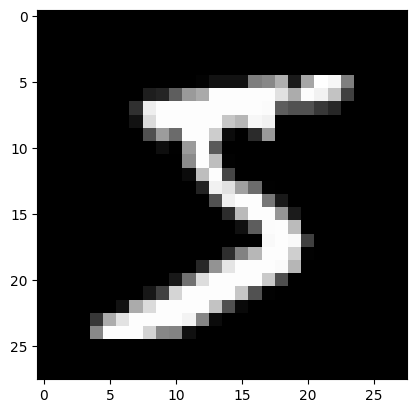

In [ ]:
plt.imshow(X)

In [ ]:
y_train[101]

7

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
type(X_train[0])

numpy.ndarray

In [ ]:
X_train =X_train.astype('float32') / 255

In [ ]:
X_test =X_test.astype('float32') / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
n_classes =10

In [ ]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#channel=1
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))


In [ ]:
model.add(Flatten())


In [ ]:
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                108170    
                                                      

In [ ]:
model.compile(loss='mse', optimizer=SGD(lr=1),metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10000,epochs=200,verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/200
6/6 [==============================] - 4s 503ms/step - loss: 0.0902 - accuracy: 0.0822 - val_loss: 0.0901 - val_accuracy: 0.0585
Epoch 2/200
6/6 [==============================] - 3s 489ms/step - loss: 0.0902 - accuracy: 0.0793 - val_loss: 0.0901 - val_accuracy: 0.0595
Epoch 3/200
6/6 [==============================] - 3s 482ms/step - loss: 0.0902 - accuracy: 0.0816 - val_loss: 0.0901 - val_accuracy: 0.0603
Epoch 4/200
6/6 [==============================] - 3s 494ms/step - loss: 0.0902 - accuracy: 0.0818 - val_loss: 0.0901 - val_accuracy: 0.0612
Epoch 5/200
6/6 [==============================] - 3s 486ms/step - loss: 0.0902 - accuracy: 0.0830 - val_loss: 0.0901 - val_accuracy: 0.0624
Epoch 6/200
6/6 [==============================] - 3s 498ms/step - loss: 0.0901 - accuracy: 0.0844 - val_loss: 0.0901 - val_accuracy: 0.0634
Epoch 7/200
6/6 [==============================] - 3s 511ms/step - loss: 0.0901 - accuracy: 0.0854 - val_loss: 0.0901 - val_accuracy: 0.0639
Epoch 8/200
6

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])
